<a href="https://colab.research.google.com/github/MargoRita99/Machine-Learning/blob/main/%D0%9B%D0%A0_1_%D0%9C%D0%B0%D0%BA%D0%B0%D1%80%D0%BE%D0%B2%D0%B0_%D0%91%D0%98%D0%92%D0%A2_22_%D0%A1%D0%9F_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

## Парная линейная регрессия  
**Цель работы**   
Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.  

**Содержание работы**  

- Загрузить данные из тектовых файлов.  
- Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.  
- Оценить на графике качество построенной модели.  
- Построить кривые обучения.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считываем данные из csv-файлов:

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [ ]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


Помимо самих значений появился столбец с номерами строк. Он нам не нужен, поэтому модифицируем процедуру чтения. Читаем только нулевой столбец, чтобы получить объект типа Series

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)["0"]
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

In [ ]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


Выведем формы массивов

In [ ]:
x.shape, y.shape

((20,), (20,))

Визуализируем датасеты, то есть как взаимно будут располагаться точки на графике

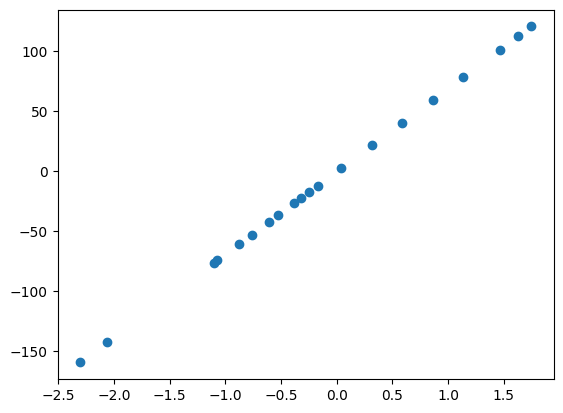

In [ ]:
plt.figure()
plt.scatter(x, y) # диаграмма рассеяния, которая строит точки по координатам
plt.show()

Построим класс, который будет реализовывать метод парной линейной регрессии

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 2
        self.b1 = 2

    """Метод предсказания результата по факторам"""
    def predict(self, x):
        return self.b0 + self.b1 * x

    """Функция ошибки"""
    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    """Метод градиентного спуска"""
    def fit(self, x, y):
        alpha = 0.5
        for _ in range(100): # прохождение определенного числа итераций
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1

Создадим объект и воспользуемся методом предсказания

In [ ]:
model = Model()
print(model.predict(100))
print("Начальная ошибка (до градиентного спуска): ", model.error(x, y))

202
Начальная ошибка (до градиентного спуска):  2790.184048800803


In [ ]:
model.fit(x, y)
print("Конечная ошибка: ", model.error(x, y))

Конечная ошибка:  7.948266658167457e-29


Нарисуем на графике линию регрессии. Модель изображаем на сгенерированных данных


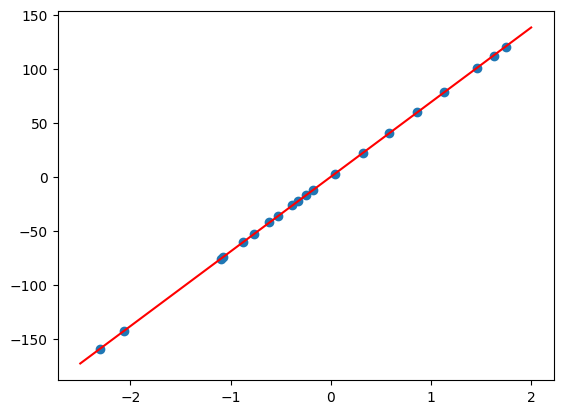

In [ ]:
plt.figure()
plt.scatter(x, y)

x_pred = np.linspace(-2.5, 2, 100) # сгенерируем равномерное распределение точек
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'r')
plt.show()

На графике видно, что прямая полностью легла в точки. Линия регрессии довольно похожа на оптимальную.  
Добавим возможность рисования кривых обучения, которые позволят понять как изменяется ошибка данной модели со временем

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    """Метод предсказания результата по факторам"""
    def predict(self, x):
        return self.b0 + self.b1 * x

    """Функция ошибки"""
    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    """Метод градиентного спуска"""
    def fit(self, x, y):
        alpha = 0.5
        errors = []
        for _ in range(20): # прохождение определенного числа итераций
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          errors.append(self.error(x, y))
        return errors

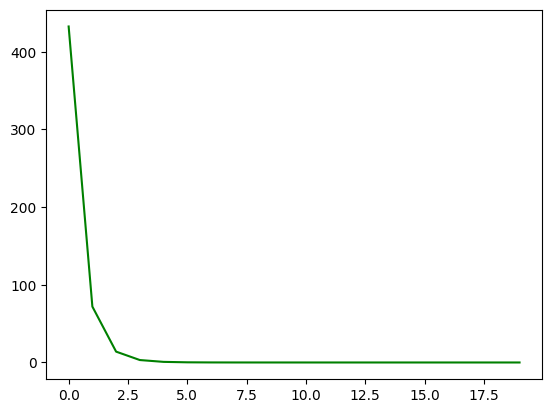

In [ ]:
model = Model()
errors = model.fit(x, y)
plt.plot(errors, 'g')

На данной кривой видно как ошибка сильно менялась в самом начале, однако на последних итерациях спуска она быстро стабилизировалась и перестала меняться

На графике обучения можно проследить влияние значения параметра alpha на обучение. Уменьшим alpha до 0.1  
Также добавим метод рисования графиков для удобства

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    """Метод предсказания результата по факторам"""
    def predict(self, x):
        return self.b0 + self.b1 * x

    """Функция ошибки"""
    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    """Метод градиентного спуска"""
    def fit(self, x, y):
        alpha = 0.1 # уменьшили параметр
        errors = []
        for _ in range(20): # прохождение определенного числа итераций
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          errors.append(self.error(x, y))
        return errors

    """Метод рисования графиков"""
    def plot_results(self, x, y, errors):
        # График кривой обучения
        plt.plot(errors, 'g')
        plt.show()

        # График регрессии
        plt.figure()
        plt.scatter(x, y)

        x_pred = np.linspace(min(x), max(x), 100)  # Авто-масштабирование
        y_pred = self.predict(x_pred)
        plt.plot(x_pred, y_pred, 'r')
        plt.show()

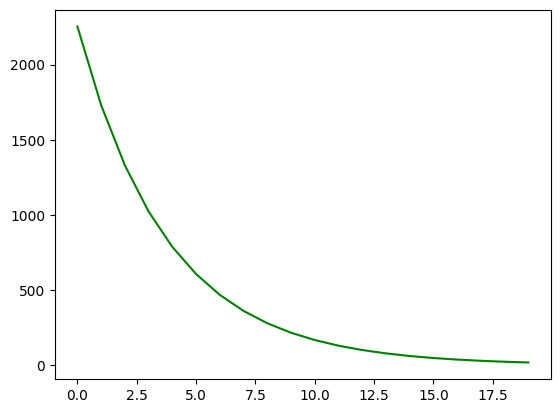

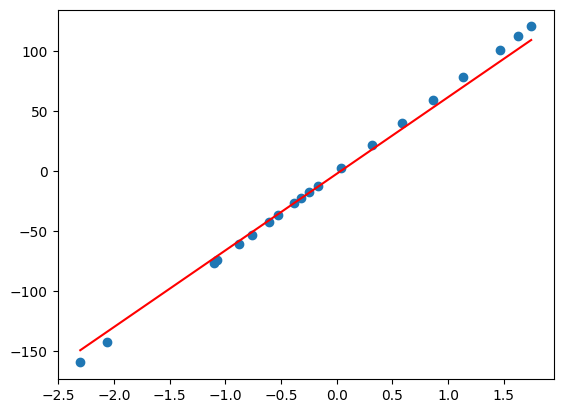

In [ ]:
model = Model()
errors = model.fit(x, y)
model.plot_results(x, y, errors)

С уменьшением скорости обучения прямая отклоняется от точек. Это связано с тем, что градиентный спуск работает медленно и 20 итераций не хватает для приближения к оптимуму

Попробуем увеличить значение скорости обучения alpha

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    """Метод предсказания результата по факторам"""
    def predict(self, x):
        return self.b0 + self.b1 * x

    """Функция ошибки"""
    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    """Метод градиентного спуска"""
    def fit(self, x, y):
        alpha = 10 # сильно увеличили параметр
        errors = []
        for _ in range(20): # прохождение определенного числа итераций
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          errors.append(self.error(x, y))
        return errors

    """Метод рисования графиков"""
    def plot_results(self, x, y, errors):
        # График кривой обучения
        plt.plot(errors, 'g')
        plt.show()

        # График регрессии
        plt.figure()
        plt.scatter(x, y)

        x_pred = np.linspace(min(x), max(x), 100)  # Авто-масштабирование
        y_pred = self.predict(x_pred)
        plt.plot(x_pred, y_pred, 'r')
        plt.show()

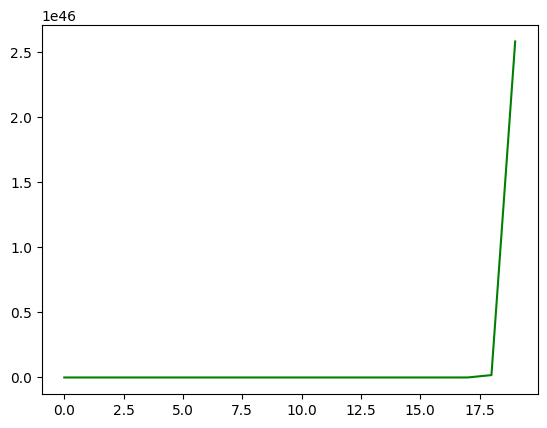

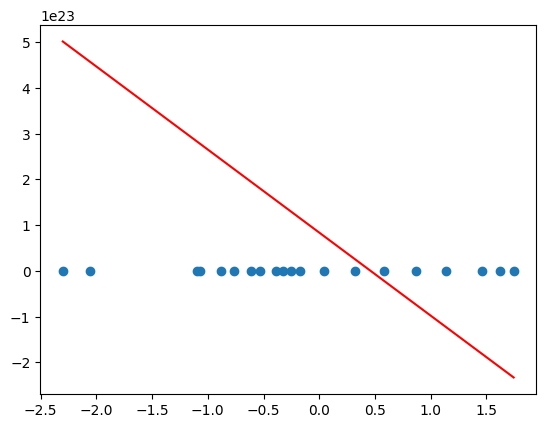

In [ ]:
model = Model()
errors = model.fit(x, y)
model.plot_results(x, y, errors)

При слишком большом значении alpha градиентный спуск начинает расходиться и модель далека от реальных точек. Применим адаптивную скорость обучения

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    """Метод предсказания результата по факторам"""
    def predict(self, x):
        return self.b0 + self.b1 * x

    """Функция ошибки"""
    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    """Метод градиентного спуска"""
    def fit(self, x, y):
        alpha = 100
        errors = [self.error(x, y)] # записываем изначальную ошибку для избегания ошибок при первом запуске
        for _ in range(20):
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          new_error = self.error(x, y) # ошибка после шага градиентного спуска
          old_error = errors[-1]
          if new_error > old_error:
            alpha /= 2
            self.__init__() # повторим инициализацию для возвращении в исходную точки при неправильном шаге

          errors.append(self.error(x, y))
        return errors

    """Метод рисования графиков"""
    def plot_results(self, x, y, errors):
        # График кривой обучения
        plt.plot(errors, 'g')
        plt.show()

        # График регрессии
        plt.figure()
        plt.scatter(x, y)

        x_pred = np.linspace(min(x), max(x), 100)  # Авто-масштабирование
        y_pred = self.predict(x_pred)
        plt.plot(x_pred, y_pred, 'r')
        plt.show()

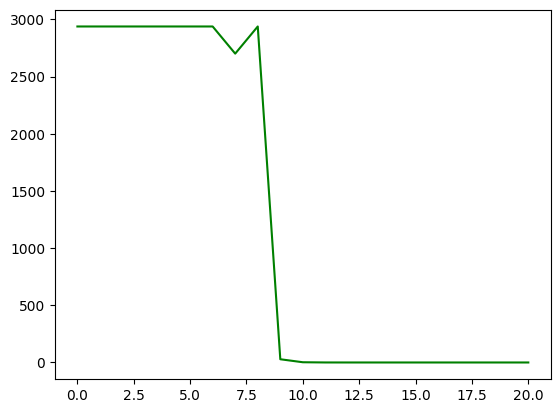

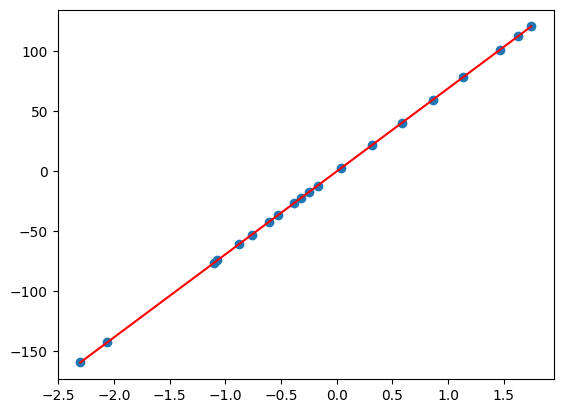

In [ ]:
model = Model()
errors = model.fit(x, y)
model.plot_results(x, y, errors)

Видим, что первые несколько итераций алгоритм подстраивается. Теперь можем задавать любое значение alpha и проблема расходимости алгоритма будет решена

Раннее завершение градиентного спуска

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self, max_iter = 100): # добавляем параметр max_iter для изменения количества итераций
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    """Метод предсказания результата по факторам"""
    def predict(self, x):
        return self.b0 + self.b1 * x

    """Функция ошибки"""
    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    """Метод градиентного спуска"""
    def fit(self, x, y):
        alpha = 0.1
        errors = [self.error(x, y)]
        for _ in range(self.max_iter): # используем параметр
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          new_error = self.error(x, y)
          old_error = errors[-1]
          if new_error > old_error:
            alpha /= 2
            self.__init__()

          if old_error - new_error < 0.001: # боремся с большим количеством итераций
             break

          errors.append(self.error(x, y))
        else:
          print('Warning!') # предупреждение о недостаточном обучении (когда количество итераций слишком маленькое)
        return errors

    """Метод рисования графиков"""
    def plot_results(self, x, y, errors):
        # График кривой обучения
        plt.plot(errors, 'g')
        plt.show()

        # График регрессии
        plt.figure()
        plt.scatter(x, y)

        x_pred = np.linspace(min(x), max(x), 100)  # Авто-масштабирование
        y_pred = self.predict(x_pred)
        plt.plot(x_pred, y_pred, 'r')
        plt.show()

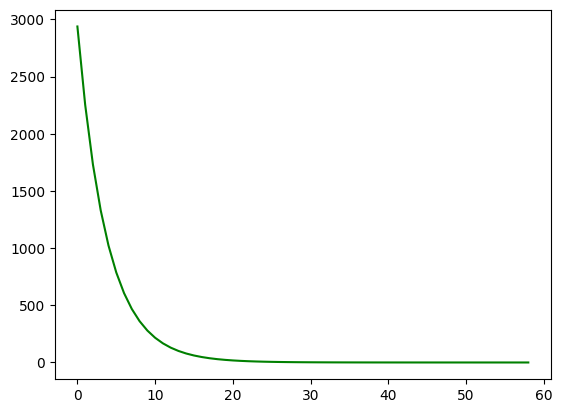

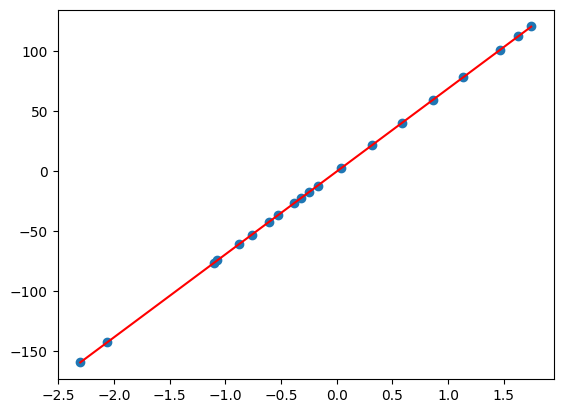

In [ ]:
model = Model()
errors = model.fit(x, y)
model.plot_results(x, y, errors)

Видим, что мы не проходим полное колчество итераций, а останавливаемся, когда ошибка перестает значимо меняться

Модифицируем код  в рамках самостоятельных заданий: Сейчас код работает только с Series. Добавим обработку DataFrame, извлекая нужный столбец

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self, max_iter = 100): # добавляем параметр max_iter для изменения количества итераций
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    """Метод преобразования входных данных в Series, если это DataFrame"""
    def preprocess_input(self, x):
        if isinstance(x, pd.DataFrame):
          return x.iloc[:, 0] # Берем только первый столбец
        return x.squeeze()

    """Метод предсказания результата по факторам"""
    def predict(self, x):
        x = self.preprocess_input(x)
        return self.b0 + self.b1 * x

    """Функция ошибки"""
    def error(self, x, y):
        x = self.preprocess_input(x)
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    """Метод градиентного спуска"""
    def fit(self, x, y):
        x = self.preprocess_input(x)
        alpha = 0.1
        errors = [self.error(x, y)]
        for _ in range(self.max_iter): # используем параметр
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          new_error = self.error(x, y)
          old_error = errors[-1]
          if new_error > old_error:
            alpha /= 2
            self.__init__()

          if old_error - new_error < 0.001: # боремся с большим количеством итераций
             break

          errors.append(self.error(x, y))
        else:
          print('Warning!') # предупреждение о недостаточном обучении (когда количество итераций слишком маленькое)
        return errors

    """Метод рисования графиков"""
    def plot_results(self, x, y, errors):
        x = self.preprocess_input(x)
        # График кривой обучения
        plt.plot(errors, 'g')
        plt.show()

        # График регрессии
        plt.figure()
        plt.scatter(x, y)

        x_pred = np.linspace(min(x), max(x), 100)  # Авто-масштабирование
        y_pred = self.predict(x_pred)
        plt.plot(x_pred, y_pred, 'r')
        plt.show()

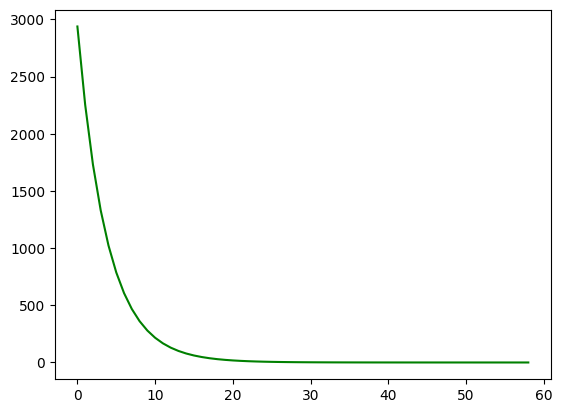

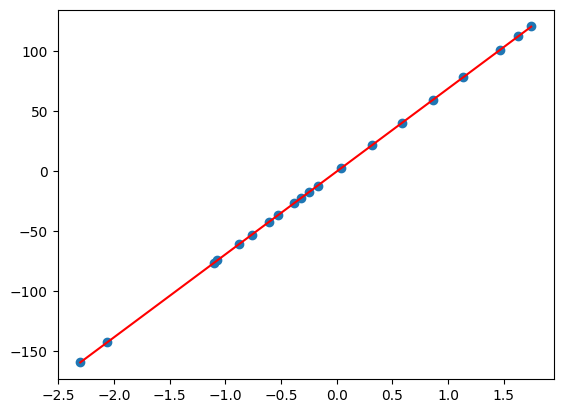

In [ ]:
model = Model()
errors = model.fit(x, y)
model.plot_results(x, y, errors)

## Множественная линейная регрессия на чистых данных  
**Цель работы**   
Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.  

**Содержание работы**  

- Построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
- Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.
- Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
- Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
- Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считываем данные из датасета под номером "0" и выведем на экран получившийся датасет

In [ ]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [ ]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


Из вывода видно, что первая строка считалась некорректно. Функция read_csv в pandas по умолчанию первую строчку csv- файла воспринимает как заголовки столбцов. Исправим ошибку, добавив атрибут header = None

In [ ]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

Проверим, правильно ли сейчас считан один из файлов

In [ ]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


Выведем форму массива

In [ ]:
x.shape, y.shape

((387, 5), (387, 1))

Видим, что в x: 387 строк и 5 колонок  
в y: 387 строк и 1 колонка

Импортируем модель линейной регрессии, которая является частью пакета linear_model и называется LinearRegression из библиотеки scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

Сначала построим парную линейную регрессию от каждого отдельного атрибута с целевой переменной

Создадим экземпляр класса

In [ ]:
binary0 = LinearRegression()

Есть некая особенность работы с dataframe в pandas. Один столбец dataframe - одномерный массив. А scikit-learn всегда предполагает, что у нас двумерный массив

In [ ]:
x[0].shape # одномерный массив

(387,)

In [ ]:
x[[0]].shape # двумерный, нужный массив

(387, 1)

Возьмем один столбец и обучим парную регрессию его с целевой переменной

In [ ]:
binary0.fit(x[[0]], y)

LinearRegression()

Мы обучили модель, теперь ее коэффициенты подобраны таким образом, чтобы лучше описывать данные. Теперь выведем ее коэффициенты

In [ ]:
binary0.coef_

array([[22.78111342]])

Вывелся коэффициент b1 в виде двумерного массива, состоящего из одной строки и одного столбца

Теперь выведем свободный коэффициент b0

In [ ]:
binary0.intercept_

array([-4.05666473])

Сделаем предсказание

In [ ]:
binary0.predict([[2]])

array([[41.50556211]])

In [ ]:
y_pred = binary0.predict(x[[0]])
y_pred # предсказанное значение y для каждой строки таблицы

array([[-2.42004238e+00],
       [-8.78210657e-01],
       [ 3.29925173e+01],
       [-3.10120198e+01],
       [-2.19025875e+01],
       [ 6.60489450e+01],
       [ 1.53292018e+00],
       [-9.48419200e+00],
       [-2.88367465e-01],
       [-4.69952278e+01],
       [-4.09231806e+01],
       [-2.70194581e+01],
       [ 1.17518386e+01],
       [-7.03559131e-02],
       [ 1.89831172e+01],
       [-1.16383540e+01],
       [-8.74458735e+00],
       [-4.09081352e+01],
       [-3.96006351e+01],
       [-8.11923054e+00],
       [ 1.70292960e+01],
       [-1.25041007e+00],
       [ 1.62900230e+01],
       [ 3.28798224e-01],
       [ 1.28098294e+00],
       [ 2.43481882e+01],
       [-3.11598811e+00],
       [ 6.01712725e+00],
       [ 2.86931625e+00],
       [ 1.17934534e+01],
       [ 2.87601089e+01],
       [ 4.68571901e+01],
       [ 1.33428473e+01],
       [ 1.28246961e+01],
       [-2.87904472e+01],
       [ 5.33892874e+00],
       [ 3.29446046e+00],
       [ 1.00257106e+01],
       [-5.9

Построим на графике модель

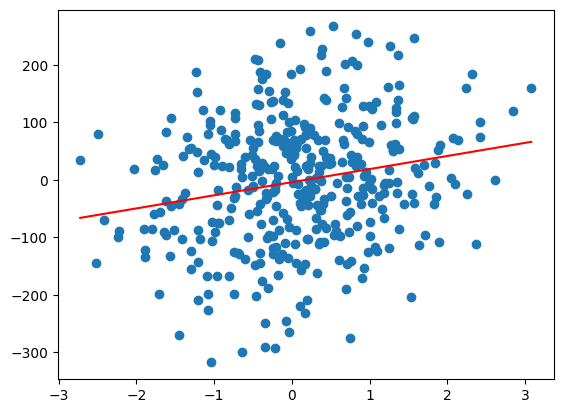

In [ ]:
plt.scatter(x[0], y) # диаграмма рессеяния

xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary0.predict(xx), c='r')

Выведем коэффициент детерминации (R2-score), который показывает насколько сильна связь между предсказанным значением(y_pred) и реальным (y)

In [ ]:
binary0.score(x[[0]], y)

0.04364336234689348

Мы видим, что коэффициент сильно меньше единицы, что говорит о плохой точности модели

Также выведем результаты регрессионного анализа на графике

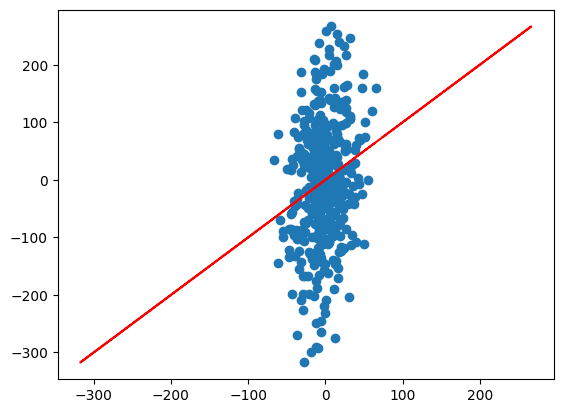

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

На графике также видно, что модель не очень качественная, поскольку точки находятся далеко от референсной линии

Теперь посторим парную линейную регрессию по первому столбцу

In [ ]:
binary1 = LinearRegression().fit(x[[1]], y)

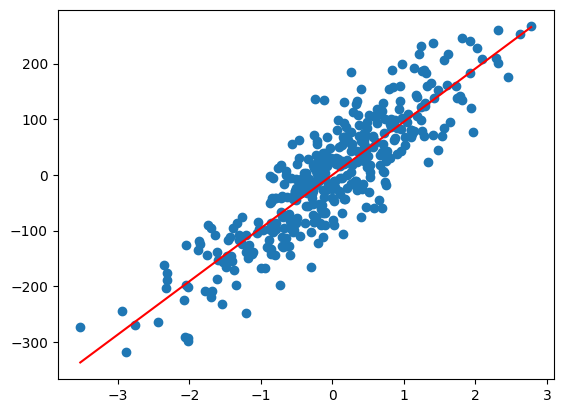

In [ ]:
plt.scatter(x[1], y) # диаграмма рессеяния

xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary1.predict(xx), c='r')

In [ ]:
binary1.score(x[[1]], y)

0.7699743283650629

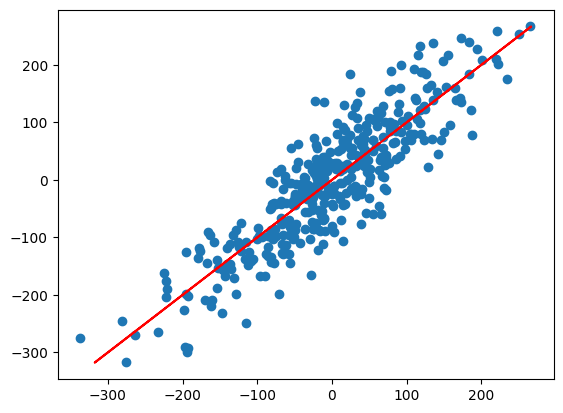

In [ ]:
y_pred = binary1.predict(x[[1]])
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

По графикам и близкому к единице коэффициенту детерминации видно, что модель намного точнее стала. По второму столбцу y предсказывается гораздо лучше, чем по второму столбцу

Поскольку вручную каждый столбец смотреть будет долго, то автоматизируем процесс

In [ ]:
for i in range(5):
  binary = LinearRegression().fit(x[[i]], y)
  print(i, binary.score(x[[i]], y))

0 0.04364336234689348
1 0.7699743283650629
2 0.18794528514998887
3 0.047470345664983093
4 0.00017176151145947838


Исходя из коэффициентов детерминации 2 столбец сильнее всего влияет на целевую переменную, а 4 столбец наоборот практически не имеет влияния  

Пока что мы строили пять разных моделей парной регрессии. Теперь построим модель множественной регрессии, которая учитывает все столбцы в модели (общий вид: y = b0x0 + b1x1 + b2x2 + ... + bnxn)

In [ ]:
multiple = LinearRegression().fit(x, y)
multiple.score(x, y)

0.9922198026415868

Коэффициент детерминации сильно близкий к единице говорит о почти идеальной модели

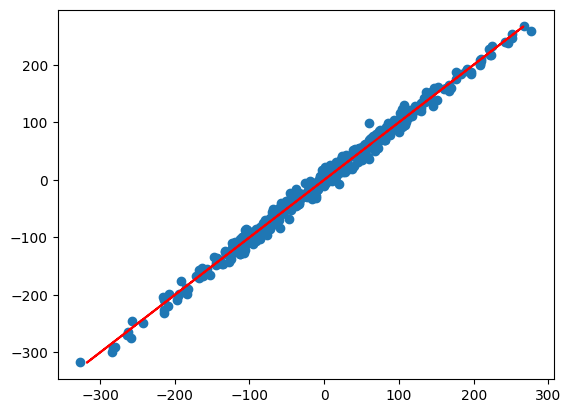

In [ ]:
y_pred = multiple.predict(x)
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

Данный график также свидетельствует о точной модели. Множественная модель оказалась намного лучше, чем любая другая модель парной регрессии

In [ ]:
multiple.coef_

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

Здесь мы вывели все коэффициенты перед x: b1, b2, b3, b4, b5. Каждый такой коэффициент показывает насколько силу линейной зависимости y по данному x  

Коэффициент b0 лежит в отдельном поле intercept_

In [ ]:
multiple.intercept_

array([0.56498354])

Дополнительные задания

Для целевой переменной и каждого из признаков построим полиномиальную регрессию второго, третьего и десятого порядков  
Импортируем модель полиномиальной регрессии, которая является частью пакета preprocessing и называется PolynomialFeatures из библиотеки scikit-learn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Для оценки качества регрессионной модели импортируем нужные метрики из модуля sklearn.metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Всего будут использоваться 3 метрики качества регрессионной модели:  
1) **r2_score** - коэффициент детерминации  
2) **mean_absolute_error** - средняя абсолютная ошибка (MAE), показывает среднее абсолютное отклонение предсказанных значений от настоящих. Чем меньше MAE, тем точнее модель  
3) **mean_squared_error** - среднеквадратичная ошибка (MSE), является средним квадратом разности между предсказанными (y_pred) и реальными значениями(y). Чем меньше MSE, тем точнее модель  
Обычно берется RMSE - корень из MSE

Создадим функцию, которая будет обучать полиномиальную регрессию и вычислять метрики

In [ ]:
"""Обучим полиномиальную регрессию заданной степени и возвратим метрики"""
def polynomial_regression(x_feature, y, degree):
    poly = PolynomialFeatures(degree=degree)  # указываем нужную степень
    x_poly = poly.fit_transform(x_feature) # метод, создающий новые признаки для модели, добавляя все возможные полиномы до заданной степени

    model = LinearRegression().fit(x_poly, y)  # обучение модели

    y_pred = model.predict(x_poly)  # Делаем предсказания

    """Считаем метрики"""
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred)

    return r2, mae, rmse

В переменную degree зададим нужные степени полинома

In [ ]:
degrees = [2, 3, 10]
results = []

Теперь будем проходиться по каждому признаку и будем выводить таблицу с результатами

In [ ]:
for i in range(x.shape[1]):
    for degree in degrees:
      r2, mae, rmse = polynomial_regression(x[[i]], y, degree)
      results.append([i, degree, r2, mae, rmse])

results_df = pd.DataFrame(results, columns=['Feature', 'Degree', 'R²', 'MAE', 'RMSE'])
print(results_df)

    Feature  Degree        R²        MAE          RMSE
0         0       2  0.043672  85.778988  11491.909255
1         0       3  0.043765  85.684404  11490.787323
2         0      10  0.050356  84.854224  11411.586520
3         1       2  0.769994  42.132303   2763.909753
4         1       3  0.771118  42.061248   2750.401156
5         1      10  0.772677  41.690871   2731.672893
6         2       2  0.190008  77.458415   9733.431563
7         2       3  0.192802  77.570200   9699.859735
8         2      10  0.204409  76.815422   9560.372197
9         3       2  0.047943  83.446884  11440.588266
10        3       3  0.050312  83.444329  11412.119234
11        3      10  0.072667  82.134261  11143.475913
12        4       2  0.001049  87.232040  12004.093016
13        4       3  0.001065  87.223572  12003.905964
14        4      10  0.045053  84.796000  11475.314939


Пранализируем полиномиальную регрессию:  
Столбец 1 является самым значимым признаком (высокий R2, низкие ошибки MAE и RMSE)  
Столбец 4 является самым слабым признаком (R2 близок к 0, высокие ошибки MAE И MSE)  
Столбцы 0, 2, 3 имеют слабую, но не нулевую связь  
Полиномы степени 2-3 дают небольшой прирост качества, а 10 степень даёт минимальное улучшение

Анализ переобучения и недообучения:  
Модель по столбцу 4 имеет слишком низкие коэффициенты детерминации и возможно недообучена  

Полиномиальная регрессия 10 степени для модели по столбцу 1 возможно переобучена из-за большого коэффициента детерминации и практически несменяющихся ошибок  

Оптимальный баланс достигается при 2-3 степени, так как улучшение R² есть, а ошибки падают, но не слишком медленно

## Регрессия на реальных данных  
**Цель работы**   
Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.  

**Содержание работы**  

- Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.
- Постройте модель регрессии для предсказания цены конкретного объекта.
- Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.
- Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Из библиотеки scikit-learn пакета datasets импортируем функцию fetch_california_housing, которая вернет датасет стоимости объектов недвижимости

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

Выведем тип переменной

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

Мы видим специальный тип данных библиотеки scikit-learn под названием bunch. Он похож по своему устройству на обычный словарь. Выведем его ключи

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Что означают данные ключи:  
data - непосредственно данные (x) или матрица атрибутов  
target - значение целевой переменной  
target_names - название целевой переменной  
feature_names - название признаков  
DESCR - описание датасета  

In [ ]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Выведем поля data и target. Именно они содержат исходные атрибуты и вектор значений целевой переменной. Посмотрим на их тип

In [ ]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Узнаем количество строк и столбцов этих массивов

In [ ]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


Мы можем сделать из двумерного массива dataframe. И поскольку названий колонок не в массиве numpy , то используем поле feature_names как названия

In [ ]:
data = pd.DataFrame(california.data, columns=california.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Каждая строка в этой таблице - район в штате Калифорния и их всего 20640 и каждый столбец соответственно характеристика  
Добавим столбец с целевой переменной стоимости Price

In [ ]:
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Посмотрим типы данных в каждом столбце и есть ли у нас отсутствующие значения

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Видим, что пропущенных данных нет и во всех колонках присутствуют только численные значения. Значит на особо не придется обрабатывать (очищать) этот датасет, он удовлетворяет требованиям к чистоте данных

Также применим статистический метод describe() чтобы увидеть основную статистику по всем колонкам

In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


Расшифровка основных статистик:  
count - количество непустых значений в каждом столбце  
mean - среднее значение для каждого числового столбца  
std - стандартное отклонение, показывающее, как сильно значения варьируются относительно среднего  
min - минимальное значение в столбце  
25% - первый квартиль (Q1), значение, ниже которого лежит 25% данных  
50% - медиана или второй квартиль (Q2), центральное значение, ниже которого лежит 50% данных  
75% - третий квартиль (Q3), значение, ниже которого лежит 75% данных
max - максимальное значение в столбце  

Теперь выделим целевую переменную из таблицы

In [ ]:
y = data.Price
X = data.drop('Price', axis=1) # где axis=1 - это удаление по столбцам

In [ ]:
y.shape, X.shape

((20640,), (20640, 8))

Начнем моделирование  
Импортируем объект линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression

Создаем модель

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Оценим точность модели

In [ ]:
model.score(X, y)

0.606232685199805

Коэффициент детерминации неплохой, 0.6. Он показывает, что модель могла бы быть более точной.

Посмотрим коэффициенты модели линейной регрессии

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Выведем название каждого из коэффициентов

In [ ]:
_ = [print(k, v) for k, v in zip(california.feature_names, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


Коэффициент 5 (Population) практически равен нулю, это значит, что соответствующий признак не влияет на значение целевой переменной  
Самый значимый параметр - AveBedrms. Имеет самое большое значение коэффициента и чем больше в доме спален, тем дороже объект  
Еще один важный параметр - MedInc. Чем выше средний доход в районе, тем дороже там недвижимость  
Атрибуты широты и долготы (Longitude и Latitude) влияют отрицательно. Чем выше их значение, тем ниже будет целевая переменная

Посмотрим значение свободного коэффициента

In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


Теперь выведем предсказания для первых 5 объектов

In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


Выведем действительные значения

In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Вручную сравнивать значения будет неудобно, поэтому нарисуем график

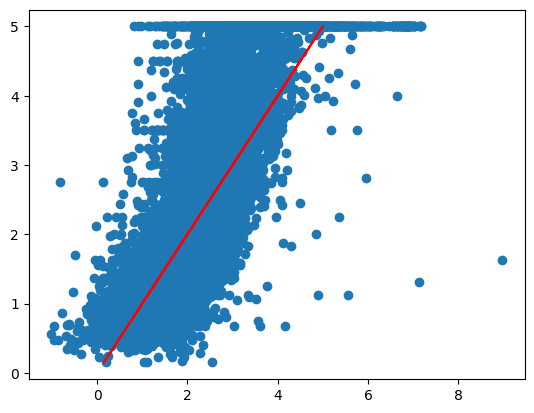

In [ ]:
plt.scatter(y_pred, y) # диаграмма рассеяния
plt.plot(y, y, c='r')

Здесь наблюдается довольно сильная зависимость. Наблюдать это можно по форме облака точек  
Однако мы видим аномальное распределение точек вверху на граничном значении цены 5. Возможно раньше цена была выше, но при обработке данных эти значения выставили равными 5

Попробуем построить другую модель - полиномиальную регрессию. Есть надежда, что введение полиномиальных признаков может существенно увеличить точность модели

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X)

Используем полиномиальные признаки 3 степени

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

Посмотрим на предсказанные значения

In [ ]:
print(y_pred_poly[:5])

[4.07963213 4.34985644 4.17485489 3.41662064 2.64484274]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Для сравнения значений нарисуем график

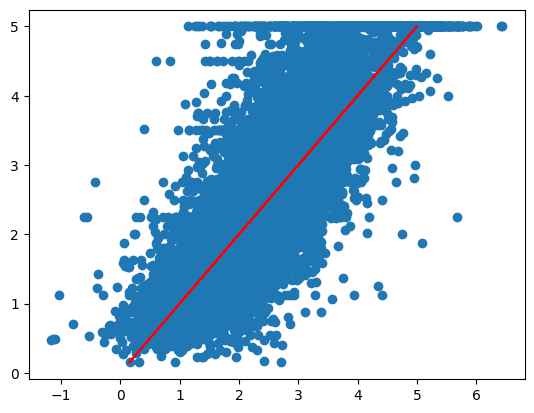

In [ ]:
plt.scatter(y_pred_poly, y) # диаграмма рассеяния
plt.plot(y, y, c='r')

На графике наблюдается смещение красной линии.Модель стала точнее

Однако выведем метрику для более точного анализа

In [ ]:
polynomial.score(poly, y)

0.7286583857949847

Метрика показывает, что вторая модель явно лучше первой, так как метрика стала больше

### Дополнительные задания

В качестве дополнительной информации посмотрим, насколько в среднем модель ошибается (средняя абсолютная ошибка MAE) и степень разброса предсказаний (среднеквадратичная ошибка MSE, RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'RMSE: {rmse}')

Средняя абсолютная ошибка (MAE): 0.5311643817546476
Среднеквадратичная ошибка (MSE): 0.5243209861846072
RMSE: 0.7241001216576387


Средняя абсолютная ошибка показывает, что наша модель ошибается на 0.53 единицы в предсказании цены жилья. Это не самая низкая ошибка, но вполне приемлемая для базовой модели.  
RMSE дает нам представление о типичной ошибке модели в тех же единицах, что и цена.
Ошибка в 0.72 сотен тысяч долларов означает, что предсказания могут отклоняться в среднем на 72 000 долларов.

Попробуем применить к той же задаче другие модели регрессии

1) Метод опорных векторов (Support Vector Regression, SVR)  
Метод опорных векторов обычно применяется для классификации, но его можно адаптировать к регрессии. Он работает, находя оптимальную гиперплоскость, которая минимизирует ошибки при предсказании.


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # Для масштабирования данных

Нормализируем данные, так как SVR чувствителен к масштабам

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

Создаем и обучаем модель SVR с гауссовым ядром и указываем kernel='rbf'. Данное ядро позволяет модели находить сложные нелинейные зависимости.

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_scaled, y_scaled)

SVR()

Предсказываем значения

In [ ]:
y_pred_scaled = svr_model.predict(X_scaled)
y_pred_SVR = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel() # обратно масштабируем предсказания

In [ ]:
print(y_pred_SVR[:5])

[4.40056238 4.32806409 4.29195409 3.37801305 2.45520444]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Мы вывели предсказанные и действительные значения. Поскольку сравнивать вручную будет неудобно, то рисуем график

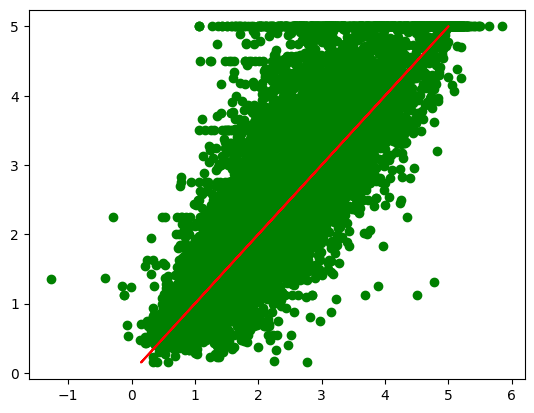

In [ ]:
plt.scatter(y_pred_SVR, y, c='g') # диаграмма рассеяния
plt.plot(y, y, c='r')

In [ ]:
svr_model.score(X_scaled, y_scaled)

0.7525779380701099

Коэффициент детерминации более 0.75 и явно больше, чем у полиномиальной и линейной регрессии. **Данная модель точнее двух предыдущих**  

2) Метод ближайших соседей (K-Nearest Neighbors, KNN)  
Алгоритм просто находит K ближайших соседей и усредняет их значения. Используем, если данные не имеют четкой структуры, но есть локальные закономерности.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Масштабируем данные

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

Обучаем модель с 5 соседями, то есть метод будет искать 5 ближайших точек к новой точке и брать среднее значение их целевых переменных.

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # указываем число соседей
knn_model.fit(X_scaled, y_scaled)

KNeighborsRegressor()

Предсказываем значения

In [ ]:
y_pred_scaled = knn_model.predict(X_scaled)
y_pred_KNN = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel() # обратное масштабирование предсказаний

Выводим

In [ ]:
print(y_pred_KNN[:5])

[4.661406 4.3096   4.236604 4.038204 2.8116  ]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Рисуем график

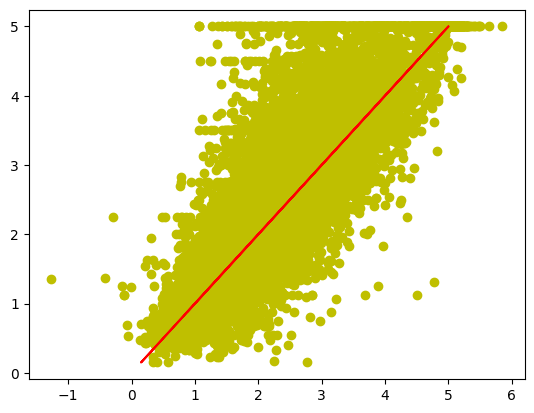

In [ ]:
plt.scatter(y_pred_SVR, y, c='y') # диаграмма рассеяния
plt.plot(y, y, c='r')

In [ ]:
knn_model.score(X_scaled, y_scaled)

0.7985691404441083

Коэффициент детерминации, равный 0.79 показывает, что модель точнее линейной, полиномиальной и лучше SVR. Видимо, данные имеют локальные закономерности

3) Многослойный перцептрон (MLP)  
MLP – это простая нейросеть, состоящая из нескольких слоев нейронов. Она может находить сложные зависимости в данных, но требует настройки гиперпараметров.

In [ ]:
from sklearn.neural_network import MLPRegressor

Здесь не нужно масштабирование данных, поэтому сразу же создадим модель и обучим ее

Создаем MLPRegressor:

hidden_layer_sizes=(100, 50) – два скрытых слоя (100 и 50 нейронов).

activation='relu' – используем функцию активации ReLU.

solver='adam' – оптимизатор Adam (хорошо работает для нейросетей).

max_iter=500 – увеличиваем число итераций обучения.

random_state=42 – фиксируем случайность для повторяемости.

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X, y)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

Делаем предсказания

In [ ]:
y_pred_mlp = mlp.predict(X)
print(y_pred_mlp[:5])

[3.91970065 3.42956058 4.11114316 3.33269557 2.59150416]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Рисуем график

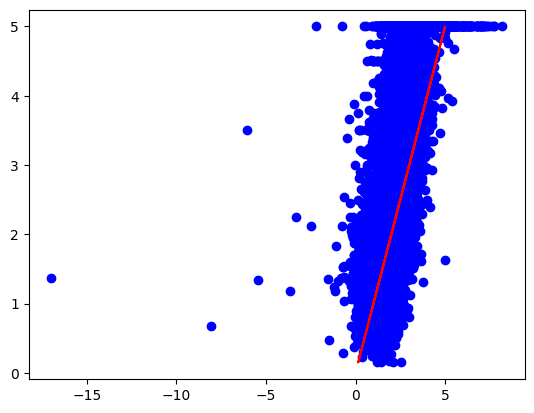

In [ ]:
plt.scatter(y_pred_mlp, y, c='b') # диаграмма рассеяния
plt.plot(y, y, c='r')

In [ ]:
mlp.score(X, y)

0.4430909255219695

Видим, что коэффициент слишком низкий. Модель явно не точна и скорее всего следует увеличить точность модели, подбирая параметры

4) Дерево решений (Decision Tree Regression)  
Decision Tree Regression строит дерево, разбивая данные на области и предсказывая среднее значение в каждой из них.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Создаем и обучаем модель

In [ ]:
tree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, random_state=42)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=6, min_samples_split=10, random_state=42)

Ограничили глубину дерева (max_depth=6), чтобы избежать переобучения  
Добавили min_samples_split=10, чтобы узлы не делились слишком часто  
Использовали random_state=42 для стабильных результатов

Делаем предсказания

In [ ]:
y_pred_tree = tree.predict(X)
print(y_pred_tree[:5])

[4.41974484 4.180872   3.76163894 3.68108089 2.90978403]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Рисуем график

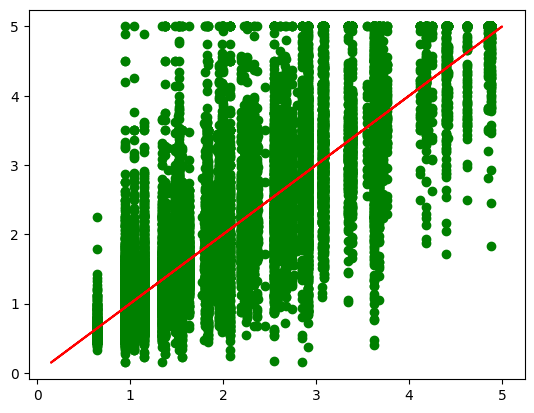

In [ ]:
plt.scatter(y_pred_tree, y, c='g') # диаграмма рассеяния
plt.plot(y, y, c='r')

In [ ]:
tree.score(X, y)

0.6683387549031599

Малый коэффициент детерминации говорит о том, что модель не самая плохая, однако и не самая лучшая

5) Гребневая регрессия (Ridge Regression)  
Гребневая регрессия — это модификация линейной регрессии, которая добавляет L2-регуляризацию.  
L2-регуляризация – штрафует модель за слишком большие коэффициенты, что помогает избежать переобучения.

In [ ]:
from sklearn.linear_model import Ridge

Масштабируем данные

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Создаем и обучаем модель и добавим регуляризацию alpha=1.0 , чтобы уменьшить переобучение

In [ ]:
ridge = Ridge(alpha=1.0)  # Параметр регуляризации
ridge.fit(X_scaled, y)

Ridge()

Делаем предсказания

In [ ]:
y_pred_ridge = ridge.predict(X_scaled)
print(y_pred_ridge[:5])

[4.13155903 3.97643156 3.67659435 3.24151311 2.41354912]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Рисуем график

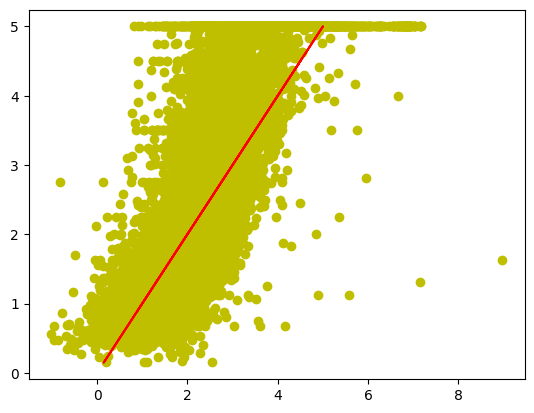

In [ ]:
plt.scatter(y_pred_ridge, y, c='y') # диаграмма рассеяния
plt.plot(y, y, c='r')

In [ ]:
ridge.score(X_scaled, y)

0.6062326414700456

Видим, что коэффициент у этой модели такой же, что и у линейной регрессии. Действительно L2-регуляризация помогает избежать переобучения. Однако точность маленькая

Теперь в рамках дополнительных заданий повторим полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes

Из библиотеки scikit-learn пакета datasets импортируем функцию load_diabetes, которая показывает прогрессирование диабета

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Выведем тип переменной

In [ ]:
type(diabetes)

sklearn.utils._bunch.Bunch

Тоже видим специальный тип данных библиотеки scikit-learn под названием bunch. Выведем его ключи

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Выведем поля data и target. Посмотрим на их тип

In [ ]:
print(type(diabetes.data), type(diabetes.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Узнаем количество строк и столбцов этих массивов

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


Мы можем сделать из двумерного массива dataframe. И поскольку названий колонок нет в массиве numpy, то используем поле feature_names как названия

In [ ]:
data_d = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data_d.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Каждая строка в этой таблице - это человек и всего их 442 и каждый столбец соответствует каждой характеристике   
Добавим столбец с целевой переменной. Целевая переменная (target) — это progression of diabetes (прогрессирование диабета) через 1 год, то есть это мера тяжести болезни на основе различных медицинских факторов.

In [ ]:
data_d['Progression_diabetes'] = diabetes.target
data_d.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression_diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Посмтрим типы данных в каждом столбце

In [ ]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   442 non-null    float64
 1   sex                   442 non-null    float64
 2   bmi                   442 non-null    float64
 3   bp                    442 non-null    float64
 4   s1                    442 non-null    float64
 5   s2                    442 non-null    float64
 6   s3                    442 non-null    float64
 7   s4                    442 non-null    float64
 8   s5                    442 non-null    float64
 9   s6                    442 non-null    float64
 10  Progression_diabetes  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Теперь выделим целевую переменную из таблицы

In [ ]:
y = data_d.Progression_diabetes
X = data_d.drop('Progression_diabetes', axis=1) # где axis=1 - удаление по столбцам

In [ ]:
y.shape, X.shape

((442,), (442, 10))

Начнем моделирование

In [ ]:
from sklearn.linear_model import LinearRegression

Создаем модель

In [ ]:
model_d = LinearRegression()
model_d.fit(X, y)

LinearRegression()

Оценим точность модели

In [ ]:
model_d.score(X, y)

0.5177484222203499

Коэффициент детерминации 0.517 нормальный, хотя модель и не считается лучшей

Посмотрим коэффициенты модели линейной регрессии

In [ ]:
print("Coefficients: \n", model_d.coef_)

Coefficients: 
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


И выведем название каждого

In [ ]:
_ = [print(k, v) for k, v in zip(diabetes.feature_names, model_d.coef_)]

age -10.009866299810684
sex -239.81564367242237
bmi 519.84592005446
bp 324.38464550232356
s1 -792.1756385522286
s2 476.7390210052569
s3 101.04326793803338
s4 177.06323767134643
s5 751.2736995571034
s6 67.62669218370515


Самый влиятельный признак - s2 так как самый большой коэффициент  
Признак, котрый практически никак не влияет на целевую переменную - признак s1

Теперь выведем предсказания

In [ ]:
y_pred_d = model_d.predict(X)
print(y_pred_d[:5])

[206.11667725  68.07103297 176.88279035 166.91445843 128.46225834]


In [ ]:
print(y[:5])

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Progression_diabetes, dtype: float64


Для сравнения нарисуем график

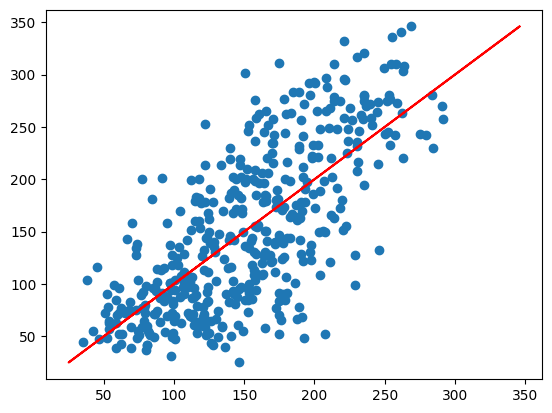

In [ ]:
plt.scatter(y_pred_d, y) # диаграмма рассеяния
plt.plot(y, y, c='r')

Форма облака точек довольно рассеяная и модель хорошо предсказывает значения переменных, но коэффициент детерминации в 0.517 показывает невысокую точность